In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df_de_taquilla = pd.read_csv('boxoffice.csv',encoding ='latin-1')
df_de_taquilla.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [4]:
forma = df_de_taquilla.shape
print(forma)
info = df_de_taquilla.info()

(2694, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [5]:
df_de_taquilla.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


In [6]:
quitar = ['world_revenue','opening_revenue']

df_de_taquilla.drop(quitar,axis=1,inplace = True)

In [7]:
df_de_taquilla.isnull().sum() * 100 / df_de_taquilla.shape[0]


title                0.000000
domestic_revenue     0.000000
distributor          0.000000
opening_theaters    11.544172
budget              85.263549
MPAA                54.528582
genres               1.447661
release_days         0.000000
dtype: float64

In [8]:
df_de_taquilla.drop('budget',axis=1, inplace=True)

In [9]:
for col in ['MPAA','genres']:
    df_de_taquilla[col] =df_de_taquilla[col].fillna(df_de_taquilla[col].mode()[0])

df_de_taquilla.dropna(inplace=True)
df_de_taquilla.isnull().sum().sum()

0

In [10]:
df_de_taquilla['domestic_revenue']=df_de_taquilla['domestic_revenue'].str[1:]

for col in ['domestic_revenue','opening_theaters','release_days',]:
    df_de_taquilla[col]= df_de_taquilla[col].str.replace(',', '')
    #filas con valores no null en las columnas que estudiamos 

    temp = (~df_de_taquilla[col].isnull())
    df_de_taquilla[temp][col] = df_de_taquilla[temp][col].convert_dtypes(float)

    df_de_taquilla[col]= pd.to_numeric(df_de_taquilla[col], errors = 'coerce')

In [11]:
df_de_taquilla.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,620181382,Walt Disney Studios Motion Pictures,4232,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,226008385,Universal Pictures,4310,PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,412563408,Warner Bros.,4165,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,389813101,Walt Disney Studios Motion Pictures,4347,PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,504014165,Walt Disney Studios Motion Pictures,4210,PG,"Family,Fantasy,Musical,Romance",290


In [12]:
df_de_taquilla.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2383.0,1.904864e+07,6.244193e+07,147.0,34519.0,272132.0,5080868.5,858373000.0
opening_theaters,2383.0,6.594830e+02,1.245347e+03,1.0,2.0,8.0,521.5,4725.0
release_days,2383.0,2.973563e+02,3.970007e+02,12.0,144.0,256.0,354.0,6507.0


In [13]:
print(df_de_taquilla.dtypes)


title               object
domestic_revenue     int64
distributor         object
opening_theaters     int64
MPAA                object
genres              object
release_days         int64
dtype: object


In [14]:
df_de_taquilla['MPAA']=df_de_taquilla['MPAA'].astype('category')

In [15]:
unique_values = df_de_taquilla['MPAA'].unique()
print(unique_values)

['PG-13', 'PG', 'R', 'Not Rated', 'G', 'NC-17', 'M/PG']
Categories (7, object): ['G', 'M/PG', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R']


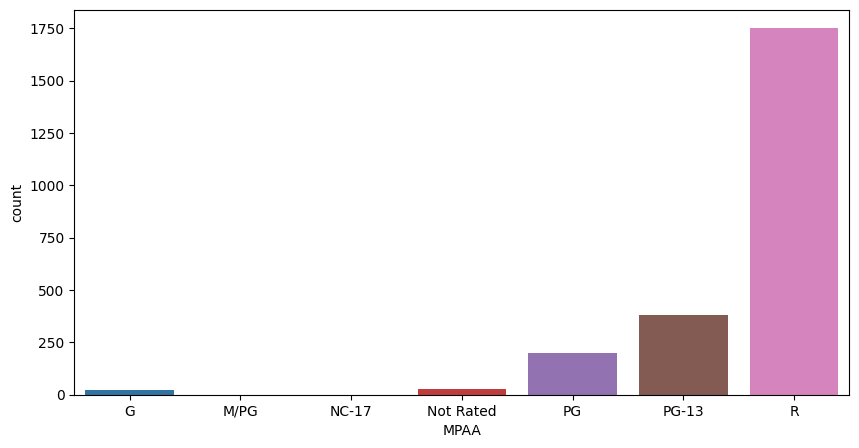

In [16]:
""" 
EN sb.countplot hay que poner como argumentos el eje x y el data frame como "data"
"""
plt.figure(figsize=(10,5))
sb.countplot(x='MPAA', data= df_de_taquilla)
plt.show()

In [17]:

"""
Aqui hubo un problema, en el mean hay que poner el argumento ese sino no funciona 
"""
df_de_taquilla.groupby('MPAA').mean(numeric_only=True)['domestic_revenue']


MPAA
G            3.539276e+07
M/PG         5.113500e+05
NC-17        1.368800e+04
Not Rated    4.897703e+05
PG           5.379622e+07
PG-13        5.891966e+07
R            6.591336e+06
Name: domestic_revenue, dtype: float64

/tmp/ipykernel_11113/4013506991.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
/tmp/ipykernel_11113/4013506991.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_de_taquilla[col])
/tmp/ipykernel_11113/4013506991.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating y

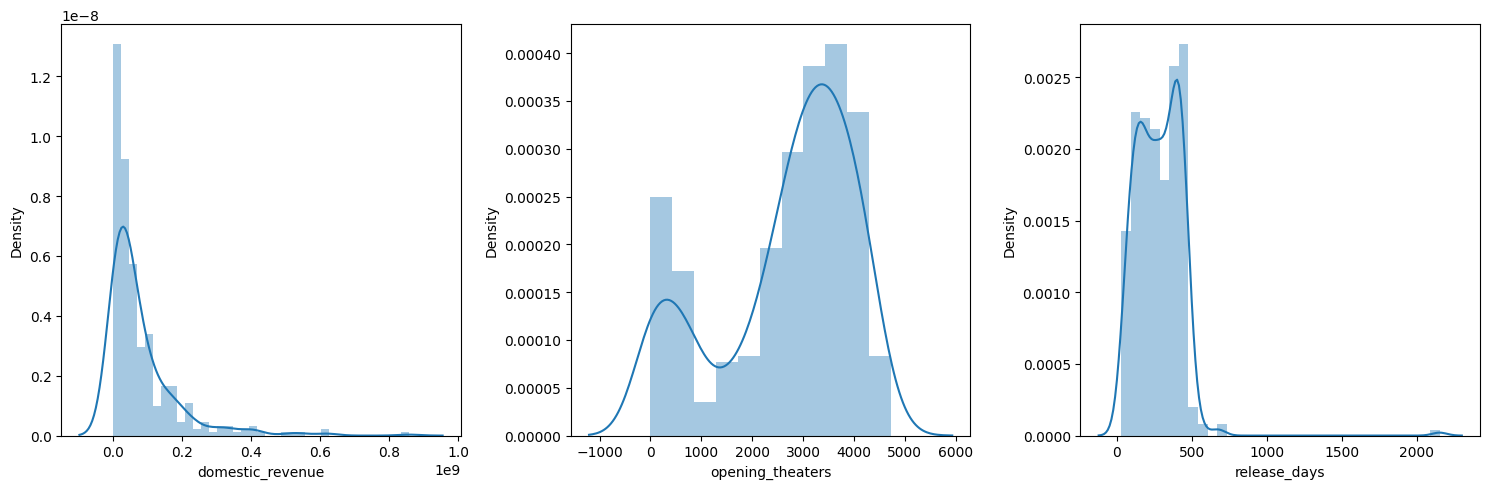

In [15]:
plt.subplots(figsize=(15,5))

features = ['domestic_revenue','opening_theaters','release_days']


""" 
El loop de abajo funcion de la siguiente manera: el enumerate es una funcion de Python imprime
los valores (i & col) que se especfican en el argumento de dicha funcion. 

Posterior a eso lo que se hace es algo similar a la primera línea de esta celda, en donde 
especificamos varias graficas en una. Sin embargo "i+1" representa el indice de cada sub grafica

con distplot creamos una grafica de distribucion(histograma)

tight_layout es para que las subgraficas esten bien espaciadas

"""

for i,col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df_de_taquilla[col])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

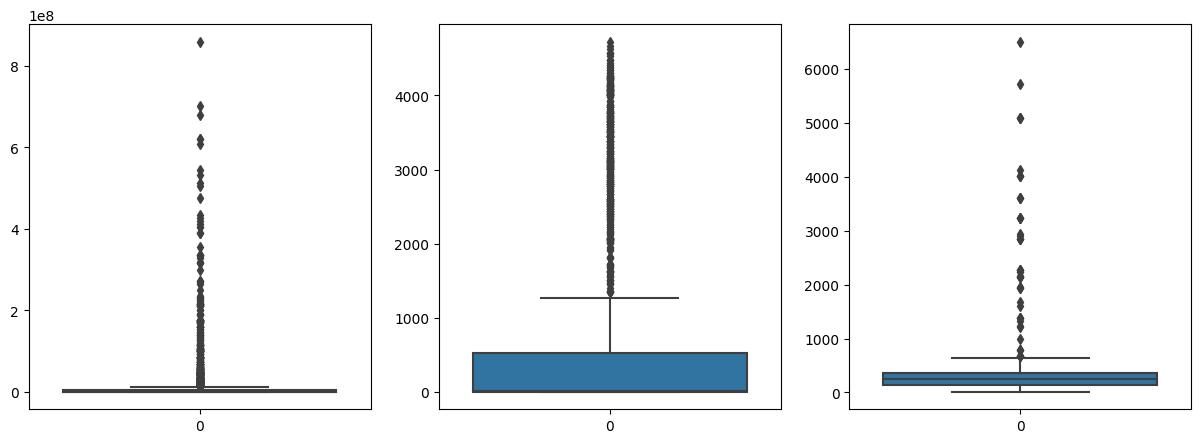

In [19]:
plt.subplots(figsize=(15,5))

features = ['domestic_revenue','opening_theaters','release_days']
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    sb.boxplot(df_de_taquilla[col])

plt.tight_layout
plt.show

In [20]:
for col in features:
    df_de_taquilla[col] = df_de_taquilla[col].apply(lambda X: np.log10(X))

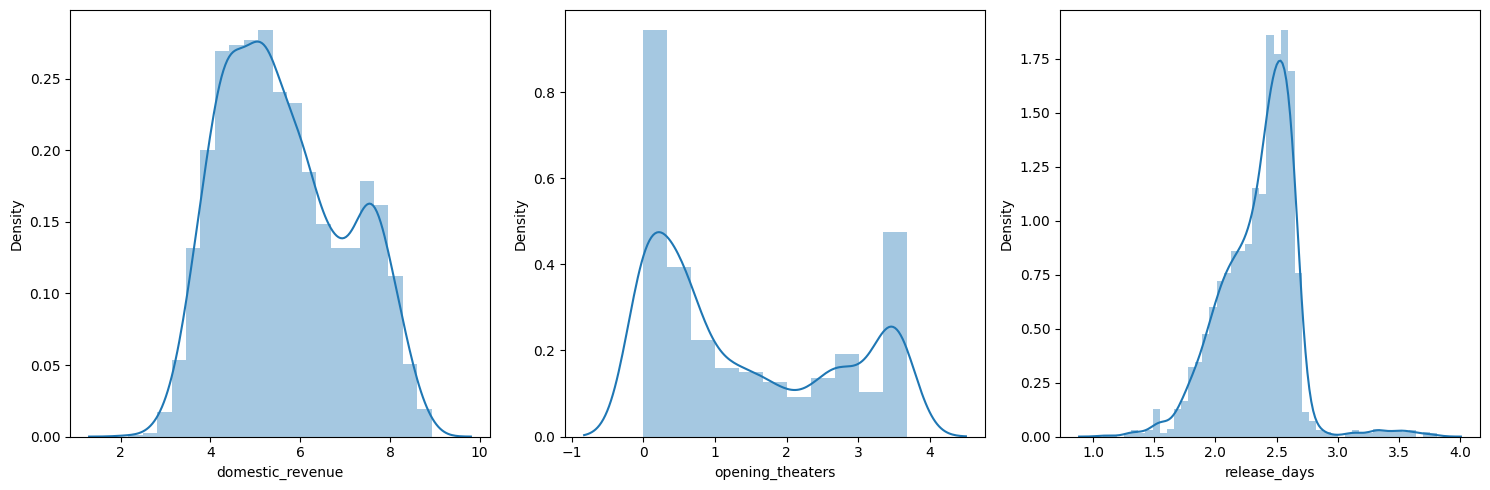

In [21]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df_de_taquilla[col])
plt.tight_layout()
plt.show()

In [22]:
vectorizer = CountVectorizer()

#Esta variable posee una herramienta perteneciente a scikit-learn que se utiliza para 
#procesar texto. Esta convierte un conjunto de documentos textuales en una matriz
#de c


vectorizer.fit(df_de_taquilla['genres'])

#Se crea un vocabulario con . fit

features = vectorizer.transform(df_de_taquilla['genres']).toarray()
genres= vectorizer.get_feature_names()
for i,name in enumerate(genres):
    df_de_taquilla[name]=features[:,1]

df_de_taquilla.drop('genres', axis=1, inplace=True)


In [23]:
removed = 0 
for col in df_de_taquilla.loc[:,'action':'western'].columns:
# the .loc escoge lugares en especifico de un df 
    if (df_de_taquilla[col]== 0).mean() > 0.95:
        removed += 1
        df_de_taquilla.drop(col,axis=1, inplace= True)

print(removed)
print(df_de_taquilla.shape)

29
(2383, 6)


In [25]:
for col in ['distributor','MPAA']:
    le = LabelEncoder()
    df_de_taquilla[col] = le.fit_transform(df_de_taquilla[col])

In [29]:
plt.figure(figsize=(8, 8))
sb.heatmap(df_de_taquilla.corr() > 0.8,
           annot=True,
           cbar=False, data=df_de_taquilla)
plt.show()



ValueError: could not convert string to float: 'Star Wars: Episode VIII - The Last Jedi'

<Figure size 800x800 with 0 Axes>